cost after  iteration 0 0.6931471810530008
cost after  iteration 1 0.6458273160705654
cost after  iteration 2 0.6009237057285932
cost after  iteration 3 0.5584152176384671
cost after  iteration 4 0.5182694786204912
cost after  iteration 5 0.48044350336155656
cost after  iteration 6 0.44488450271957236
cost after  iteration 7 0.41153084010404384
cost after  iteration 8 0.3803130997538963
cost after  iteration 9 0.3511552301665677
cost after  iteration 10 0.3239757210541144
cost after  iteration 11 0.29868876532694727
cost after  iteration 12 0.27520532373894013
cost after  iteration 13 0.25343388188348664
cost after  iteration 14 0.23328021956093697
cost after  iteration 15 0.2146438176699771
cost after  iteration 16 0.19740246074914172
cost after  iteration 17 0.18135501592193062
cost after  iteration 18 0.1660168275894526
cost after  iteration 19 0.14991295371016203


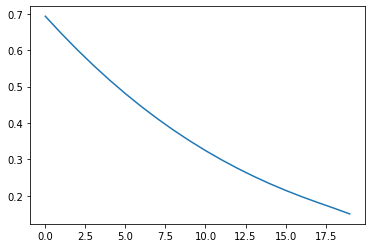

In [27]:
import numpy as np
import matplotlib.pyplot as plt
X=np.random.randn(10,50)
y= np.random.randn(1,50)<0.8
Y= np.multiply(np.ones((1,50)),y)
layer_dims=[X.shape[0],5,4,2,1]
L=len(layer_dims)


def initialize_parameters(layer_dims):
    L=len(layer_dims)
    parameters={}
    for l in range(1,L):
        parameters["W"+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b"+str(l)]=np.zeros((layer_dims[l],1))
    return parameters


def linear_forward(X, parameters,layer_dims):
    L=len(layer_dims)
    caches= []
    Z={}
    A={}
    A["A0"] = X
    for l in range(L-1):
        Z["Z"+str(l+1)]=np.dot(parameters["W"+str(l+1)],A["A"+str(l)]) + parameters["b"+str(l+1)]
        A["A"+str(l+1)]= np.maximum(Z["Z"+str(l+1)],0)
    Z["Z"+str(L-1)]=np.dot(parameters["W"+str(L-1)],A["A"+str(L-2)]) + parameters["b"+str(L-1)]
    A["A"+str(L-1)]= 1 / (1+np.exp(-Z["Z"+str(L-1)]))
    return A,Z


def cost(a,Y):
    m=Y.shape[1]
    c=-1/m * np.sum(np.dot(Y,(np.log(a)).T)+np.dot((1-Y),(np.log(1-a)).T))
    
    return c


def linear_backward(parameters,Y,A,Z):
    grads={}
    L=5
    AL= A['A'+str(L-1)]
    m=Y.shape[1]  
    grads['Z'+str(L-1)]= 1/m * AL-Y
    A['A0']=X    
    for l in range(L-1,0,-1):
        #print(l)
        grads['W'+str(l)]= np.dot(grads['Z'+str(l)],A['A'+str(l-1)].T)
        grads['b'+str(l)]=np.sum(grads['Z'+str(l)],axis = 0)
        grads['Z'+str(l-1)]=np.multiply(np.dot(parameters['W'+str(l)].T,grads['Z'+str(l)] ), 1)
    return grads

    
def update_parameters(parameters, grads):
    for l in range(1,L): 
        parameters["W"+str(l)] = parameters["W"+str(l)] - 0.1 * grads['W'+str(l)]
        parameters["b"+str(l)] = parameters["b"+str(l)] - 0.1 * grads['b'+str(l)]
        
    return parameters

costs=[]
parameters=initialize_parameters(layer_dims)
for i in range(20):
    
    A,Z= linear_forward(X,parameters,layer_dims)
    c=cost(A['A'+str(L-1)],Y)
    costs.append(c)
    print(f'cost after  iteration {i}', c)
    grads=linear_backward(parameters,Y,A,Z)
    parameters=update_parameters(parameters,grads)
plt.plot(np.squeeze(costs))    


In [28]:
cost(a,Y)
A,Z=linear_forward(X, parameters)
parameters = initialize_parameters(layer_dims)
#print(parameters)


#print(Y)


#print("a=", a)


NameError: name 'a' is not defined

In [5]:
for i in reversed(range(L-1)):
    print(i)






3
2
1
0


In [ ]:
update_parameters(parameters, d)
